#### Task A
Create a Data Audit for the Pima Indians Diabetes Database. The audit should cover:


    1. Data Overview & Structure:
			- Provide a summary of the dataset.
			- Identify the number of rows and columns.
			- List all variables names and their data types.
			- Classify each variable as categorical or numerical.	

In [1]:
import pandas as pd

# Lade das Dataset
df = pd.read_csv("../data/diabetes.csv")

# Zeige die ersten Zeilen des Datensatzes
print("Ersten 5 Zeilen des Datensatzes:")
print(df.head(5), "\n")

# Zusammenfassung des Datensatzes
print("Statistische Zusammenfassung des Datensatzes:")
print(df.describe(), "\n")

# Anzahl der Zeilen und Spalten
print("Anzahl der Zeilen und Spalten:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

# Variablennamen und deren Datentypen
print("Variablennamen und Datentypen:")
print(df.dtypes, "\n")

# Klassifikation der Variablen in kategorisch oder numerisch
categorical_vars = df.select_dtypes(include=["object"]).columns.tolist()
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Kategorische Variablen:", categorical_vars if categorical_vars else "Keine kategorischen Variablen")
print("Numerische Variablen:", numerical_vars)


Ersten 5 Zeilen des Datensatzes:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Statistische Zusammenfassung des Datensatzes:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.7994

    2. Summary Statistics:
			- Compute key statistics such as mean, median, minimum, maximum, and standard deviation.
			- Create a histogram for each variable.
   			- Identify any unusual values that stand out and possible skew of the data.

Schlüsselstatistiken für numerische Variablen:
                                mean    median     min     max         std
Pregnancies                 3.845052    3.0000   0.000   17.00    3.369578
Glucose                   120.894531  117.0000   0.000  199.00   31.972618
BloodPressure              69.105469   72.0000   0.000  122.00   19.355807
SkinThickness              20.536458   23.0000   0.000   99.00   15.952218
Insulin                    79.799479   30.5000   0.000  846.00  115.244002
BMI                        31.992578   32.0000   0.000   67.10    7.884160
DiabetesPedigreeFunction    0.471876    0.3725   0.078    2.42    0.331329
Age                        33.240885   29.0000  21.000   81.00   11.760232
Outcome                     0.348958    0.0000   0.000    1.00    0.476951 



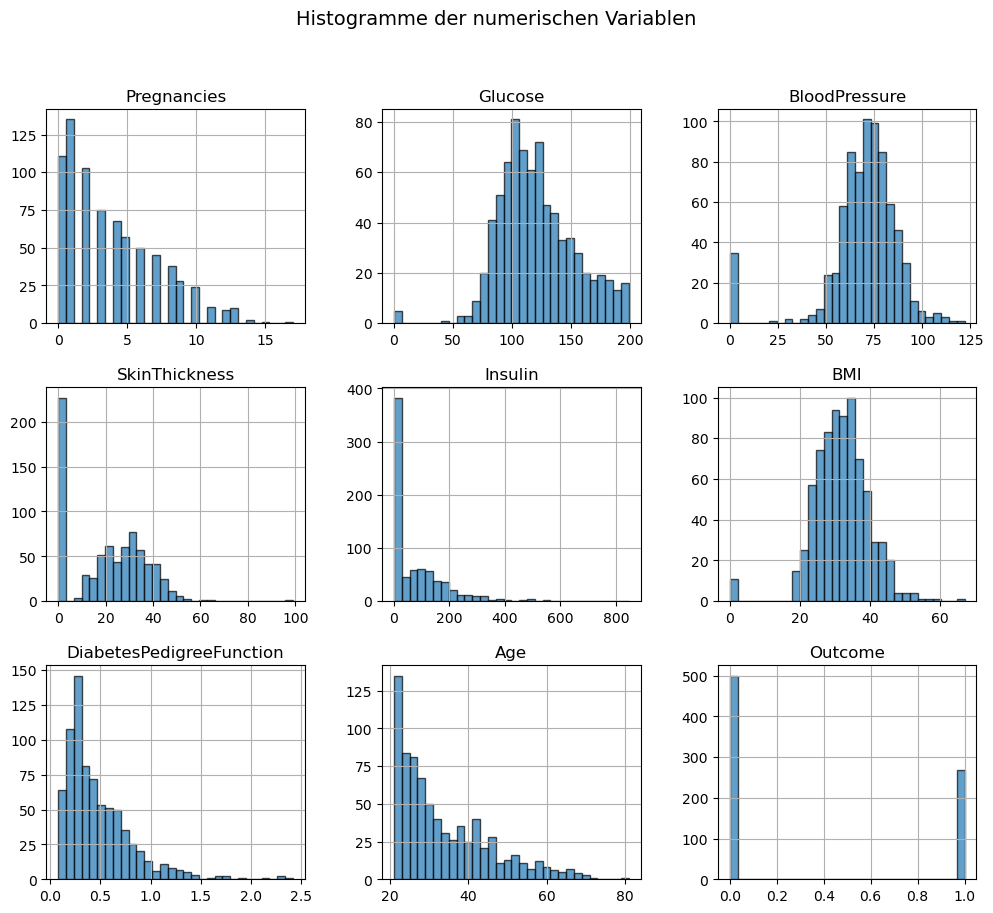

Skewness der Daten:
Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Anzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Berechnung der Schlüsselstatistiken für numerische Variablen
summary_stats = df.describe().T
summary_stats["median"] = df.median()
summary_stats = summary_stats[["mean", "median", "min", "max", "std"]]

print("Schlüsselstatistiken für numerische Variablen:")
print(summary_stats, "\n")

# Erstelle Histogramme für jede numerische Variable
df.hist(figsize=(12, 10), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle("Histogramme der numerischen Variablen", fontsize=14)
plt.show()

# Identifiziere mögliche ungewöhnliche Werte und Skewness
skewness = df.skew()
print("Skewness der Daten:")
print("Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)")
print(skewness)

# Identifizierung potenzieller Ausreißer basierend auf 3 Standardabweichungen
outliers = df[(np.abs(df - df.mean()) > 3 * df.std())].count()
print("\nAnzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):")
print(outliers)


    3. Outlier:
			- Decide on a formal method to detect univariate outliers.
			- Report the number of outliers per variable.
			- Create scatterplots for each combination of variables.
			- Can you identify possible multivariate outliers that you did not detect as univariate outliers?

Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):
{'Pregnancies': 4, 'Glucose': 5, 'BloodPressure': 45, 'SkinThickness': 1, 'Insulin': 34, 'BMI': 19, 'DiabetesPedigreeFunction': 29, 'Age': 9, 'Outcome': 0} 



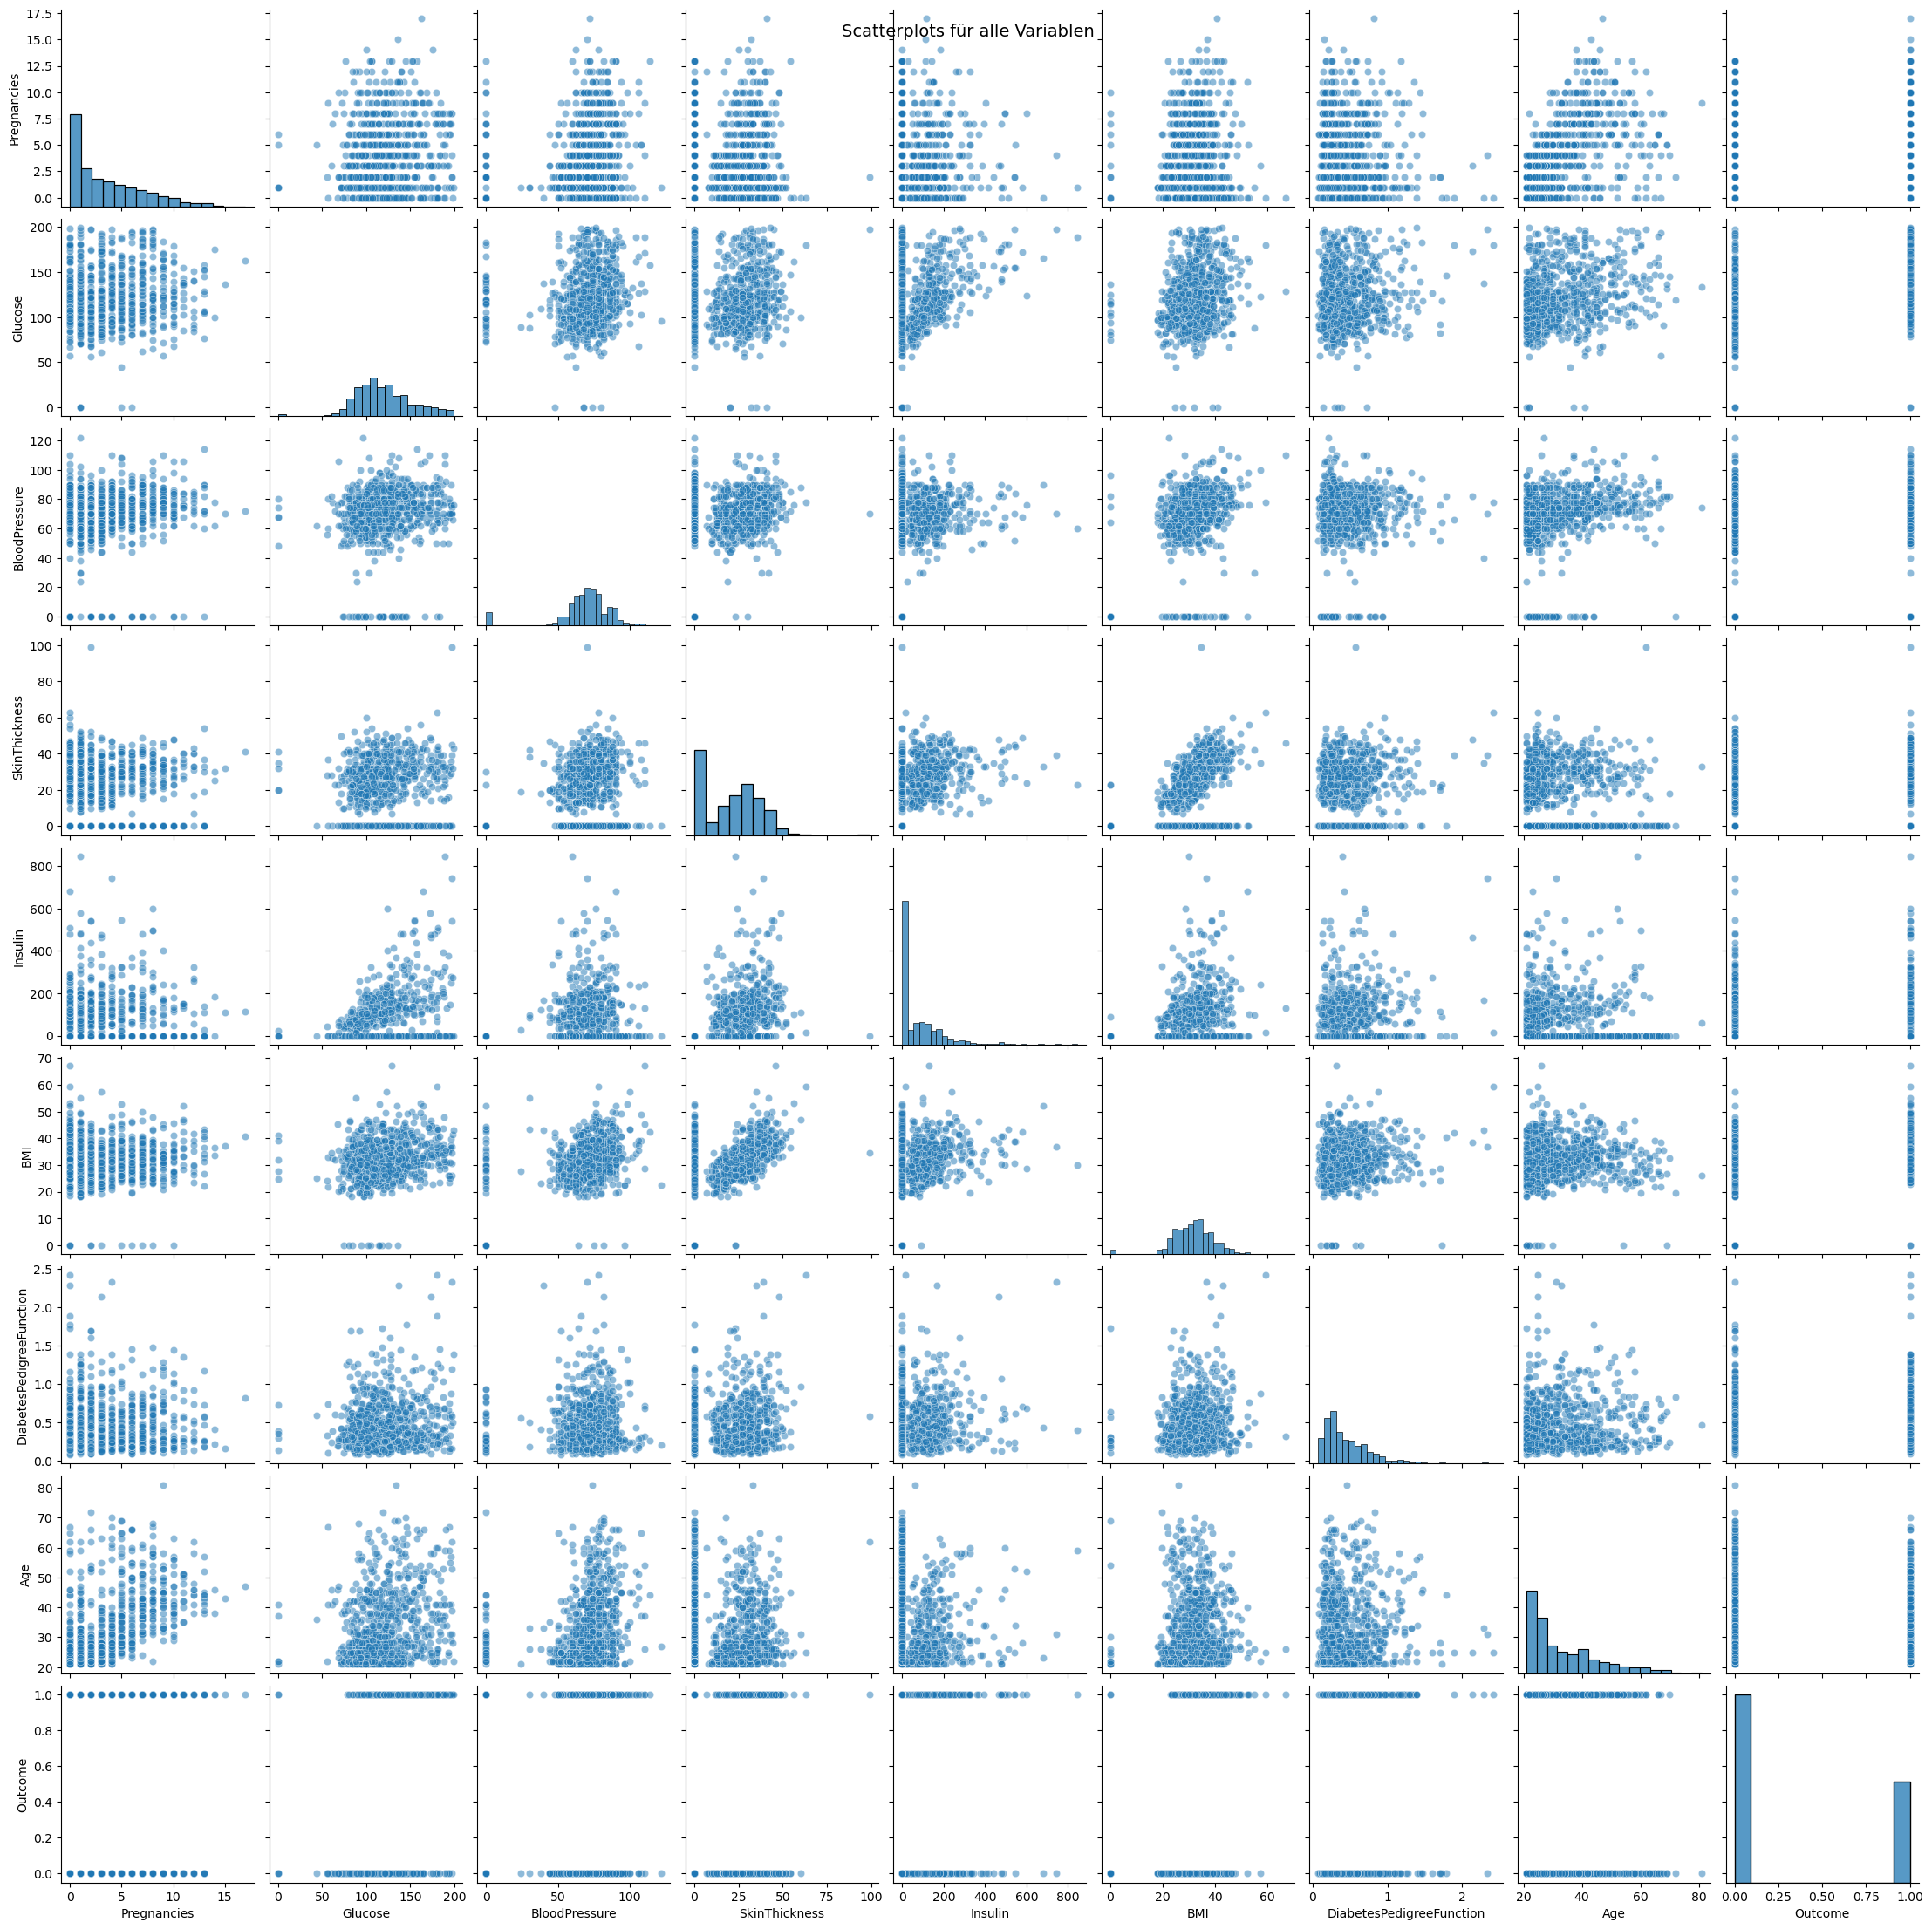


Anzahl der multivariaten Ausreißer: 20


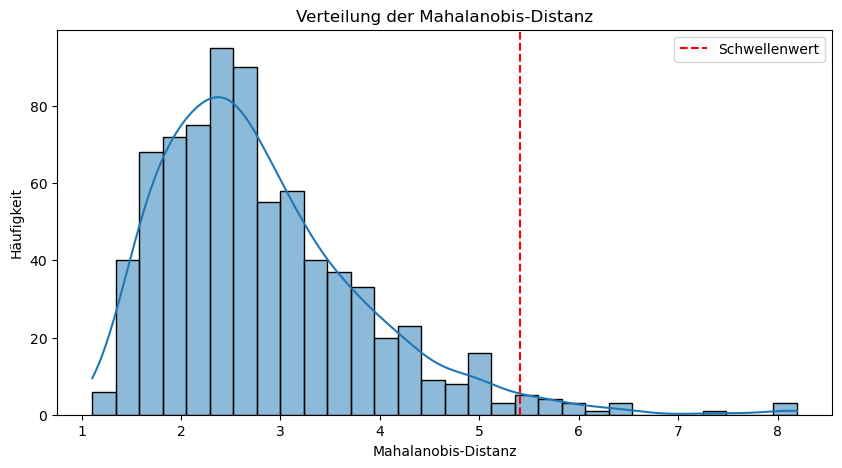

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Methode zur Erkennung von univariaten Ausreißern: Tukey's Fence (IQR-Methode)
outlier_counts = {}
df_outliers = df.copy()

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    outlier_counts[col] = outlier_mask.sum()
    df_outliers[col + "_outlier"] = outlier_mask

# Anzahl der Ausreißer pro Variable ausgeben
print("Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):")
print(outlier_counts, "\n")

# Scatterplots für jede Kombination von Variablen
sns.pairplot(df, diag_kind="hist", plot_kws={"alpha": 0.5})
plt.suptitle("Scatterplots für alle Variablen", fontsize=14)
plt.show()

# Multivariate Ausreißer mit Mahalanobis-Distanz erkennen
from scipy.spatial.distance import mahalanobis

def mahalanobis_distance(df, cov_inv):
    mean = df.mean().values
    return df.apply(lambda row: mahalanobis(row, mean, cov_inv), axis=1)

# Berechnung der Mahalanobis-Distanz für numerische Variablen
df_numeric = df.select_dtypes(include=["int64", "float64"])
cov_matrix = np.cov(df_numeric.T)
cov_matrix_inv = np.linalg.inv(cov_matrix)

df["Mahalanobis_Distance"] = mahalanobis_distance(df_numeric, cov_matrix_inv)

# Definiere einen Schwellenwert für multivariate Ausreißer (Chi-Quadrat-Verteilung)
threshold = np.percentile(df["Mahalanobis_Distance"], 97.5)
df["Multivariate_Outlier"] = df["Mahalanobis_Distance"] > threshold

# Anzahl der multivariaten Ausreißer ausgeben
print("\nAnzahl der multivariaten Ausreißer:", df["Multivariate_Outlier"].sum())

# Visualisierung der multivariaten Ausreißer
plt.figure(figsize=(10, 5))
sns.histplot(df["Mahalanobis_Distance"], bins=30, kde=True)
plt.axvline(threshold, color="red", linestyle="dashed", label="Schwellenwert")
plt.title("Verteilung der Mahalanobis-Distanz")
plt.xlabel("Mahalanobis-Distanz")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()


Die Mahalanobis-Distanz misst, wie weit ein Datenpunkt von der „zentralen Struktur“ eines Datensatzes entfernt ist, unter Berücksichtigung von Korrelationen zwischen Variablen.

- Sie zeigt, wie ungewöhnlich ein Punkt in einem mehrdimensionalen Raum ist.
- Höhere Werte bedeuten, dass der Punkt weiter von der Hauptverteilung entfernt liegt (möglicher Ausreißer).

Schwellenwert 97.5% -> rote Linie
Die oberen 2.5% werden als Ausreißer festgelegt


    4. Missing Values:,
        - Identify columns with missing values,
        - Discuss possible strategies to handle the missing data.

In [5]:
import pandas as pd

# Ersetze 0-Werte durch NaN für die Analyse fehlender Werte
df_missing = df.replace(0, pd.NA)

# Identifiziere Spalten mit fehlenden Werten
missing_counts = df_missing.isna().sum()
missing_columns = missing_counts[missing_counts > 0]

# Zeige die Anzahl der fehlenden Werte pro Spalte
print("Anzahl der fehlenden Werte pro Spalte:")
print(missing_columns)

# Diskutiere mögliche Strategien zum Umgang mit fehlenden Werten:
strategies = {
    "Löschen der Zeilen": "Falls nur wenige fehlende Werte existieren, können betroffene Zeilen entfernt werden.",
    "Mittelwert-/Median-Imputation": "Numerische Werte können mit dem Mittelwert oder Median der Spalte ersetzt werden.",
    "Vorherige/Nächste Werte übernehmen (Forward Fill / Backward Fill)": "Bei Zeitreihendaten kann man vorherige oder nachfolgende Werte übernehmen.",
    "Hot-Deck-Imputation": "Fehlende Werte werden durch ähnliche vorhandene Werte ersetzt.",
    "Regression/ML-Modelle": "Vorhersage fehlender Werte anhand anderer Variablen durch Machine Learning."
}

print("\nStrategien zum Umgang mit fehlenden Werten:")
for strategy, description in strategies.items():
    print(f"- {strategy}: {description}")


Anzahl der fehlenden Werte pro Spalte:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64

Strategien zum Umgang mit fehlenden Werten:
- Löschen der Zeilen: Falls nur wenige fehlende Werte existieren, können betroffene Zeilen entfernt werden.
- Mittelwert-/Median-Imputation: Numerische Werte können mit dem Mittelwert oder Median der Spalte ersetzt werden.
- Vorherige/Nächste Werte übernehmen (Forward Fill / Backward Fill): Bei Zeitreihendaten kann man vorherige oder nachfolgende Werte übernehmen.
- Hot-Deck-Imputation: Fehlende Werte werden durch ähnliche vorhandene Werte ersetzt.
- Regression/ML-Modelle: Vorhersage fehlender Werte anhand anderer Variablen durch Machine Learning.


    5. Correlations.
			- Create a correlation matrix for the dataset.
			- Visualize the correlation matrix.

Korrelationsmatrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

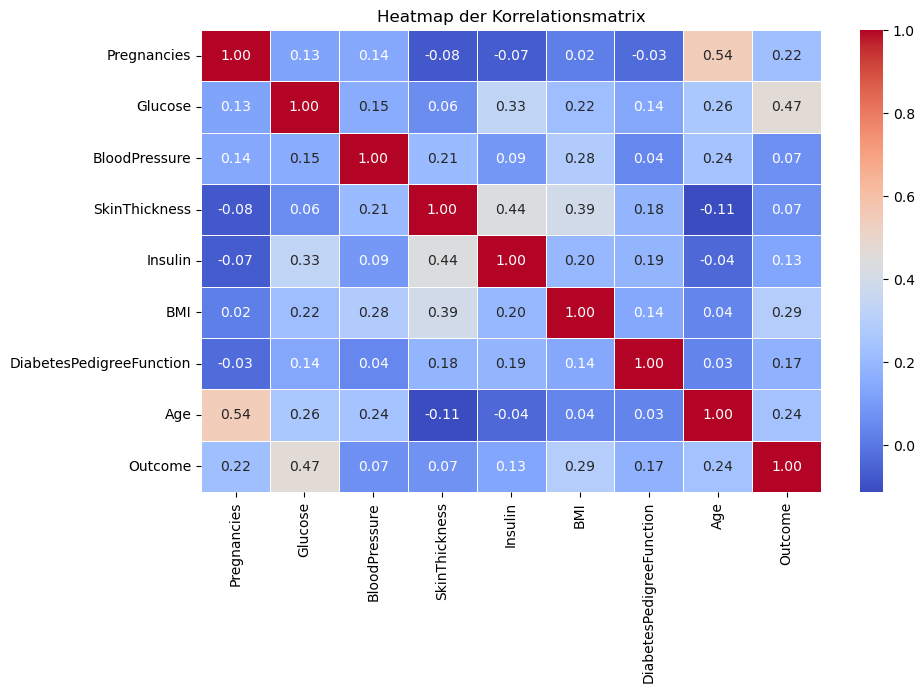

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Überprüfe, ob die Spalten existieren, bevor sie entfernt werden
columns_to_remove = ["Mahalanobis_Distance", "Multivariate_Outlier"]
existing_columns = [col for col in columns_to_remove if col in df.columns]

# Entferne nur vorhandene Spalten
df_filtered = df.drop(columns=existing_columns, errors='ignore')

# Erstelle die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Zeige die Korrelationsmatrix als Tabelle
print("Korrelationsmatrix:")
print(correlation_matrix)

# Visualisiere die Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap der Korrelationsmatrix")
plt.show()


#### Task B
Based on your Data Audit, prepare your data for further analysis by handling outliers and missing data.


/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_89867/866295548.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_89867/866295548.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_89867/866295548.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_89867/866295548.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an 

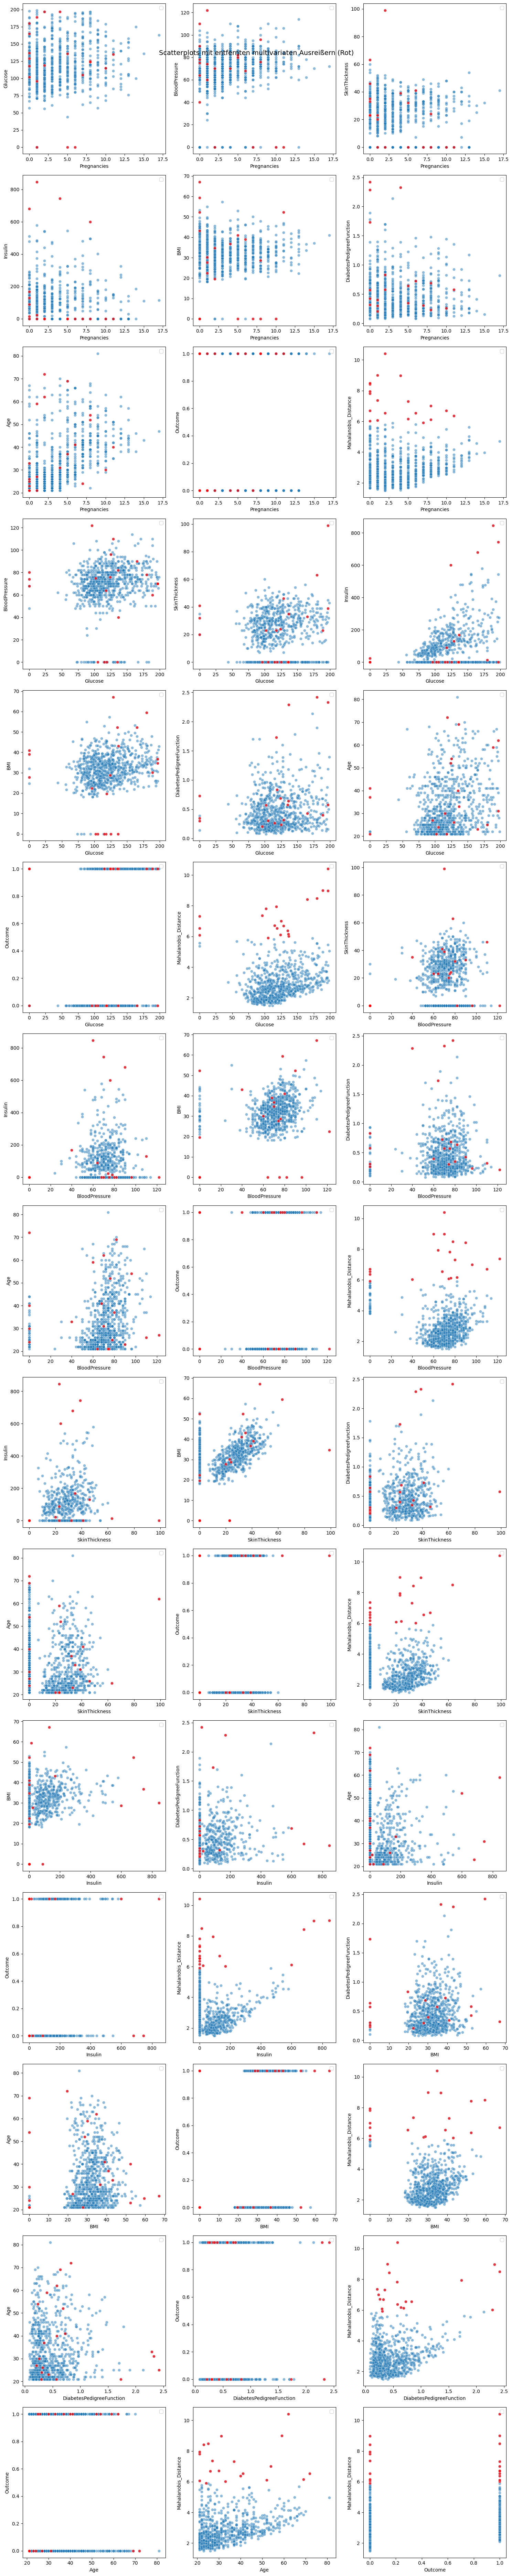

Neuer DataFrame ohne multivariate Ausreißer: (748, 10)


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis

# Berechnung der Mahalanobis-Distanz für numerische Variablen
df_numeric = df.select_dtypes(include=["int64", "float64"])
cov_matrix_inv = np.linalg.inv(np.cov(df_numeric.T))
df["Mahalanobis_Distance"] = df_numeric.apply(lambda row: mahalanobis(row, df_numeric.mean().values, cov_matrix_inv), axis=1)

# Definiere den Schwellenwert für multivariate Ausreißer (97.5%-Quantil)
threshold = np.percentile(df["Mahalanobis_Distance"], 97.5)

# Identifiziere entfernte multivariate Ausreißer
removed_outliers = df[df["Mahalanobis_Distance"] > threshold]

# Scatterplots für jede Kombination numerischer Variablen mit markierten Ausreißern
num_vars = df_numeric.columns
num_vars_combinations = [(x, y) for i, x in enumerate(num_vars) for y in num_vars[i + 1:]]

# Dynamisch die Anzahl der Subplots anpassen, um eine bessere Lesbarkeit zu gewährleisten
num_plots = len(num_vars_combinations)
cols = 3  # Anzahl der Spalten in der Plot-Anordnung
rows = (num_plots // cols) + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, (x, y) in enumerate(num_vars_combinations):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5, ax=axes[i])
    sns.scatterplot(data=removed_outliers, x=x, y=y, color="red", alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].legend()

# Falls es mehr Subplots als Daten gibt, die überschüssigen Plots ausblenden
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Scatterplots mit entfernten multivariaten Ausreißern (Rot)", fontsize=14)
plt.show()

# Entferne multivariate Ausreißer basierend auf der 97.5%-Grenze
df_filtered = df[df["Mahalanobis_Distance"] <= threshold].drop(columns=["Mahalanobis_Distance"])

print(f"Neuer DataFrame ohne multivariate Ausreißer: {df_filtered.shape}")


In [36]:
import pandas as pd

# Ersetze 0-Werte durch NaN für die Analyse fehlender Werte
df_missing = df.replace(0, pd.NA)

# Zähle die Anzahl von 0-Werten oder NaN-Werten pro Zeile
df_missing["Missing_Count"] = df_missing.isna().sum(axis=1)

# Cluster nach Anzahl der fehlenden Werte
missing_clusters = df_missing["Missing_Count"].value_counts().sort_index()

# Ausgabe der Cluster-Anzahl
print("🔹 Anzahl der Zeilen pro Cluster (basierend auf fehlenden Werten):")
print(missing_clusters)


🔹 Anzahl der Zeilen pro Cluster (basierend auf fehlenden Werten):
Missing_Count
0    111
1    283
2    196
3    134
4     35
5      8
6      1
Name: count, dtype: int64


In [ ]:
# Filtern der Zeilen mit genau 4 oder 5 fehlenden Werten
df_missing_filtered = df_missing[(df_missing["Missing_Count"] == 5) | (df_missing["Missing_Count"] == 6)]

# Anzeigen der gefilterten Zeilen
print("🔹 Zeilen mit 5 oder 6 fehlenden Werten:")
print(df_missing_filtered)
print(df_missing_filtered.shape)

🔹 Zeilen mit 5 oder 6 fehlenden Werten:
    Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
49            7     105          <NA>          <NA>    <NA>  <NA>   
60            2      84          <NA>          <NA>    <NA>  <NA>   
81            2      74          <NA>          <NA>    <NA>  <NA>   
336        <NA>     117          <NA>          <NA>    <NA>  33.8   
426        <NA>      94          <NA>          <NA>    <NA>  <NA>   
494           3      80          <NA>          <NA>    <NA>  <NA>   
522           6     114          <NA>          <NA>    <NA>  <NA>   
589        <NA>      73          <NA>          <NA>    <NA>  21.1   
697        <NA>      99          <NA>          <NA>    <NA>  25.0   

     DiabetesPedigreeFunction  Age Outcome  Mahalanobis_Distance  \
49                      0.305   24    <NA>              4.153597   
60                      0.304   21    <NA>              4.381915   
81                      0.102   22    <NA>              5.341520 

In [50]:
# Indizes der entfernten multivariaten Ausreißer
removed_outliers_indices = df_missing[df_missing["Mahalanobis_Distance"] > threshold_missing].index

# Indizes der Zeilen mit 5 oder 6 fehlenden Werten
removed_missing_indices = df_no_outliers[df_no_outliers["Missing_Count"] >= 5].index

# Entferne multivariate Ausreißer basierend auf der 97.5%-Grenze aus df_missing
df_no_outliers = df_missing[df_missing["Mahalanobis_Distance"] <= threshold_missing].drop(columns=["Mahalanobis_Distance"])

# Entferne Zeilen mit genau 5 oder 6 fehlenden Werten (0 oder NaN)
df_final = df_no_outliers[df_no_outliers["Missing_Count"] < 5]

# Entferne die "Missing_Count"-Spalte, da sie nicht mehr benötigt wird
df_final = df_final.drop(columns=["Missing_Count"])

print(f"Neuer DataFrame ohne multivariate Ausreißer und ohne Zeilen mit 5 oder 6 fehlenden Werten: {df_final.shape}")

# Zeige die Indizes der entfernten Zeilen mit Gründen an (sortiert)
removed_indices = sorted(set(removed_outliers_indices).union(set(removed_missing_indices)))
print("\nEntfernte Zeilen mit Begründung:")
for idx in removed_indices:
    reason = []
    if idx in removed_outliers_indices:
        reason.append("Multivariater Ausreißer (Mahalanobis-Distanz)")
    if idx in removed_missing_indices:
        reason.append("Zu viele fehlende Werte (5 oder 6)")
    print(f"Index {idx}: {', '.join(reason)}")


Neuer DataFrame ohne multivariate Ausreißer und ohne Zeilen mit 5 oder 6 fehlenden Werten: (743, 10)

Entfernte Zeilen mit Begründung:
Index 4: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 8: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 13: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 45: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 49: Zu viele fehlende Werte (5 oder 6)
Index 58: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 60: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 81: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 177: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 228: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 247: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 328: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 336: Zu viele fehlende Werte (5 oder 6)
Index 370: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 371: Multivariater Ausreißer (Mahalanobis-Distanz)
Index 415: Multivariater Ausreißer (Mahala

#### Task C
Test different methods to sample training and test data from the dataset. Compare the sampled datasets based on the descriptive methods you have learned and evaluate which sampling method worked best.

1. Basic Train–Test Split

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: 75% for training, 25% for testing
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Check sizes
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

# Basic descriptive stats for comparison
print("\nTrain set descriptive stats:")
print(train_df.describe(include='all'))

print("\nTest set descriptive stats:")
print(test_df.describe(include='all'))



Train set size: 576
Test set size: 192

Train set descriptive stats:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    576.000000  576.000000     576.000000     576.000000  576.000000   
unique          NaN         NaN            NaN            NaN         NaN   
top             NaN         NaN            NaN            NaN         NaN   
freq            NaN         NaN            NaN            NaN         NaN   
mean       3.741319  120.659722      69.505208      20.494792   80.362847   
std        3.305452   32.133182      18.399810      15.424655  116.223541   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      64.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   37.000000   
75%        6.000000  138.250000      80.000000      32.000000  127.500000   
max       17.000000  199.000000     122.000000      63.000000  846.000000   

      

2. k-Fold Cross Validation 

    With k-fold cross validation, you split your data into k folds (e.g., 5). Each fold in turn becomes the test set while the remaining k-1 folds become the training set. For descriptive comparisons, you can look at each fold’s distribution:

In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_descriptives = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(df), start=1):
    fold_train = df.iloc[train_index]
    fold_test  = df.iloc[test_index]
    

    
    fold_descriptives.append({
        'Fold': fold_idx,
        'Train_Size': len(fold_train),
        'Test_Size': len(fold_test),
    })

# Summarize the fold-by-fold comparison
fold_df = pd.DataFrame(fold_descriptives)
print("\nk-Fold descriptive comparison:")
print(fold_df)



k-Fold descriptive comparison:
   Fold  Train_Size  Test_Size
0     1         614        154
1     2         614        154
2     3         614        154
3     4         615        153
4     5         615        153


3. Bootstrapping

    Bootstrapping repeatedly draws samples with replacement (meaning some rows appear multiple times, others not at all). If your dataset has 
    𝑁
    N rows, each bootstrap sample is also 
    𝑁
    N rows, but randomly drawn with replacement.

    Below is an example of creating one bootstrap sample and comparing its stats. If you wanted multiple bootstrap samples, you’d wrap this in a loop and store metrics from each repetition.

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Beispielskript für Datenvorverarbeitung, Train-Test-Split, k-Fold und Bootstrapping:
- Liest einen Datensatz ein (CSV oder anderweitig).
- Zeigt beschreibende Statistiken, Korrelationen etc.
- Führt einen Train–Test-Split durch und zeigt Vergleich.
- Führt k-fold Cross-Validation durch (nur die Aufteilung, ohne Training).
- Erstellt mehrere Bootstrap-Samples, berechnet einfache Kennzahlen und zeigt den Vergleich.
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold

def main():
    # =========================================================================
    # 1. DATEN EINLESEN ODER ERSTELLEN
    # =========================================================================
    # Beispiel: CSV-Datei einlesen
    # Passen Sie den Dateinamen und Pfad nach Bedarf an, z.B.:
    # df = pd.read_csv("mein_dataset.csv")
    
    # Hier ein Beispiel-Dataset (z.B. Pima Diabetes) direkt aus dem Code:
    
    print("=== Datensatz (ersten Zeilen) ===")
    print(df.head())
    
    # =========================================================================
    # 2. BESCHREIBENDE STATISTIKEN UND ÜBERSICHT
    # =========================================================================
    print("\n=== Form des Datensatzes ===")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    
    print("\n=== Datentypen ===")
    print(df.dtypes)
    
    # Fehlende Werte identifizieren (NaN). Zur Demo fügen wir hier mal NaN ein:
    # df.loc[2, 'Insulin'] = np.nan  # Beispiel
    print("\n=== Anzahl fehlender Werte pro Spalte ===")
    print(df.isnull().sum())
    
    # Grundstatistiken
    print("\n=== Statistische Zusammenfassung (describe) ===")
    print(df.describe(include='all'))
    
    # Korrelationen (nur wenn numerische Spalten vorhanden)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        print("\n=== Korrelationsmatrix ===")
        print(df[numeric_cols].corr())
    
    # =========================================================================
    # 3. TRAIN-TEST-SPLIT
    # =========================================================================
    train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
    
    print("\n=== Train–Test-Split ===")
    print(f"Train set size: {len(train_df)}")
    print(f"Test  set size: {len(test_df)}")
    
    print("\nTrain set descriptive stats:")
    print(train_df.describe(include='all'))
    
    print("\nTest set descriptive stats:")
    print(test_df.describe(include='all'))
    
    # =========================================================================
    # 4. K-FOLD CROSS VALIDATION
    # =========================================================================
    # Nur die Aufteilung, ohne konkretes Modelltraining in diesem Beispiel.
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    folds_info = []
    
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df), start=1):
        folds_info.append({
            "Fold": fold_idx,
            "Train_Size": len(train_idx),
            "Test_Size":  len(val_idx)
        })
    
    fold_df = pd.DataFrame(folds_info)
    print("\n=== k-Fold descriptive comparison ===")
    print(fold_df)
    
    # =========================================================================
    # 5. MEHRERE BOOTSTRAP-SAMPLES ERZEUGEN
    # =========================================================================
    def bootstrap_sample(dataframe, random_state=None):
        """Erzeugt ein Bootstrap-Sample aus 'dataframe' mit Ersatz."""
        return dataframe.sample(n=len(dataframe), replace=True, random_state=random_state)
    
    NUM_BOOTSTRAPS = 5
    bootstrap_list = []
    
    for i in range(NUM_BOOTSTRAPS):
        # Jeder Durchlauf bekommt einen anderen Seed
        boot_df = bootstrap_sample(df, random_state=42 + i)
        bootstrap_list.append(boot_df)
    
    print(f"\n=== Es wurden {NUM_BOOTSTRAPS} Bootstrap-Samples erzeugt ===")
    
    # Einfacher Vergleich: Mittelwert der Spalte 'Glucose' in jedem Bootstrap
    stats_list = []
    
    for i, bdf in enumerate(bootstrap_list, start=1):
        mean_glu = bdf['Glucose'].mean()
        std_glu  = bdf['Glucose'].std()
        stats_list.append({
            "Bootstrap": i,
            "Mean_Glucose": mean_glu,
            "Std_Glucose":  std_glu,
            "N_rows":       len(bdf)
        })
    
    boot_stats_df = pd.DataFrame(stats_list)
    print("\n=== Glucose-Statistiken in jedem Bootstrap-Sample ===")
    print(boot_stats_df)
    
    # =========================================================================
    # 6. OUT-OF-BAG (OOB) BEISPIEL (fakultativ)
    # =========================================================================
    # Zeigen, wie man Indizes identifiziert, die im jeweiligen Bootstrap NICHT enthalten sind.
    # Das kann man für eine Art "Test" (OOB-Fehler) nutzen. Hier nur ein kurzes Beispiel:
    print("\n=== Out-of-Bag-Größe je Bootstrap ===")
    for i, bdf in enumerate(bootstrap_list, start=1):
        chosen_indices = bdf.index  # kann Duplikate enthalten
        unique_indices = np.unique(chosen_indices)  # eindeutige Indizes
        oob_indices = df.index.difference(unique_indices)
        print(f"Bootstrap {i}: OOB-Größe = {len(oob_indices)}")
    
    print("\n*** Skript beendet ***")

# ----------------------------------------------------------------------
# Hauptaufruf
# ----------------------------------------------------------------------
if __name__ == "__main__":
    main()


=== Datensatz (ersten Zeilen) ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Mahalanobis_Distance  \
0                     0.627   50        1              2.879702   
1                     0.351   31        0              1.958846   
2                     0.672   32        1              3.483229   
3                     0.167   21        0              1.710876   
4                     2.288   33        1              6.065897   

   Multivariate_Outlier  
0                 False  
1                 False  
2                 False  
3                 False  
